# **📘 [LDATS2350] - DATA MINING**

## **📊 Python18 - Simple Regression**

**Prof. Robin Van Oirbeek**  

<br/>

**🧑‍🏫 Guillaume Deside** *(guillaume.deside@uclouvain.be)*  

---

## **🔹 What is Regression?**
Regression is a fundamental technique in supervised learning that predicts a **continuous output variable (Y)** based on input features **(X)**. The goal is to model the **relationship between dependent and independent variables**.

Regression is used in various real-world applications such as:
- Predicting **house prices** based on size and location.
- Estimating **sales revenue** based on marketing spend.
- Forecasting **stock prices** based on historical trends.

---

## **🔹 Simple Linear Regression**
**Simple Linear Regression** models the relationship between one **independent variable** (X) and a **dependent variable** (Y) using a straight-line equation:


$$Y = wX + b$$

where:
- $ Y $ = **Predicted value (target variable)**
- $ X $ = **Feature (independent variable)**
- $ w $ = **Slope (coefficient)**
- $ b $ = **Intercept (bias term)**

🔹 **Goal:** Find $ w $ and $ b $ that minimize the error.

---

## **🔹 Multiple Linear Regression**
When multiple independent variables are used, we generalize the equation:


$$Y = w_1 X_1 + w_2 X_2 + ... + w_n X_n + b$$

where:
- $ X_1, X_2, ..., X_n $ are input features.
- $ w_1, w_2, ..., w_n $ are the weights (coefficients) of each feature.

💡 **Linear Regression assumes:**
1. **Linearity** – The relationship between X and Y is linear.
2. **Independence** – Features are independent of each other.
3. **Homoscedasticity** – Equal variance in residuals.
4. **Normality** – Residuals are normally distributed.

---

## **🔹 Performance Metrics for Regression**
To evaluate the accuracy of a regression model, we use the following metrics:

### **📌 1️⃣ Mean Absolute Error (MAE)**

$$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$
- Measures the average absolute difference between actual and predicted values.
- **Lower MAE** = **Better model performance**.

### **📌 2️⃣ Mean Squared Error (MSE)**

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$
- Squares the errors, penalizing larger mistakes.
- Sensitive to outliers.

### **📌 3️⃣ Root Mean Squared Error (RMSE)**

$$RMSE = \sqrt{MSE}$$
- Same unit as Y, making it more interpretable.

### **📌 4️⃣ R² Score (Coefficient of Determination)**

$$R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}$$
- Measures how much variance in Y is explained by X.
- **\( R^2 \) close to 1** = Model fits well.

---




# Loading Data

In [3]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import os

# Create subfolder
os.makedirs("figures/simple_regression", exist_ok=True)


In [5]:
from keras.datasets import boston_housing

# Load the Boston Housing dataset
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# Print the shape of the training and test datasets
print("Training data shape:", train_data.shape)
print("Training targets shape:", train_targets.shape)
print("Test data shape:", test_data.shape)
print("Test targets shape:", test_targets.shape)


Training data shape: (404, 13)
Training targets shape: (404,)
Test data shape: (102, 13)
Test targets shape: (102,)


In [7]:
df_boston = pd.DataFrame(train_data)
df_boston['target'] = train_targets
df_boston.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


<Axes: >

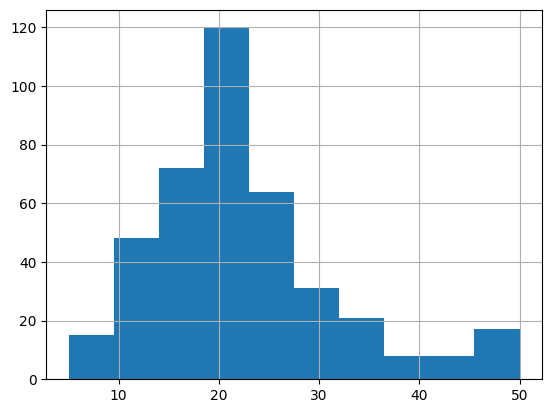

In [9]:
df_boston['target'].hist()

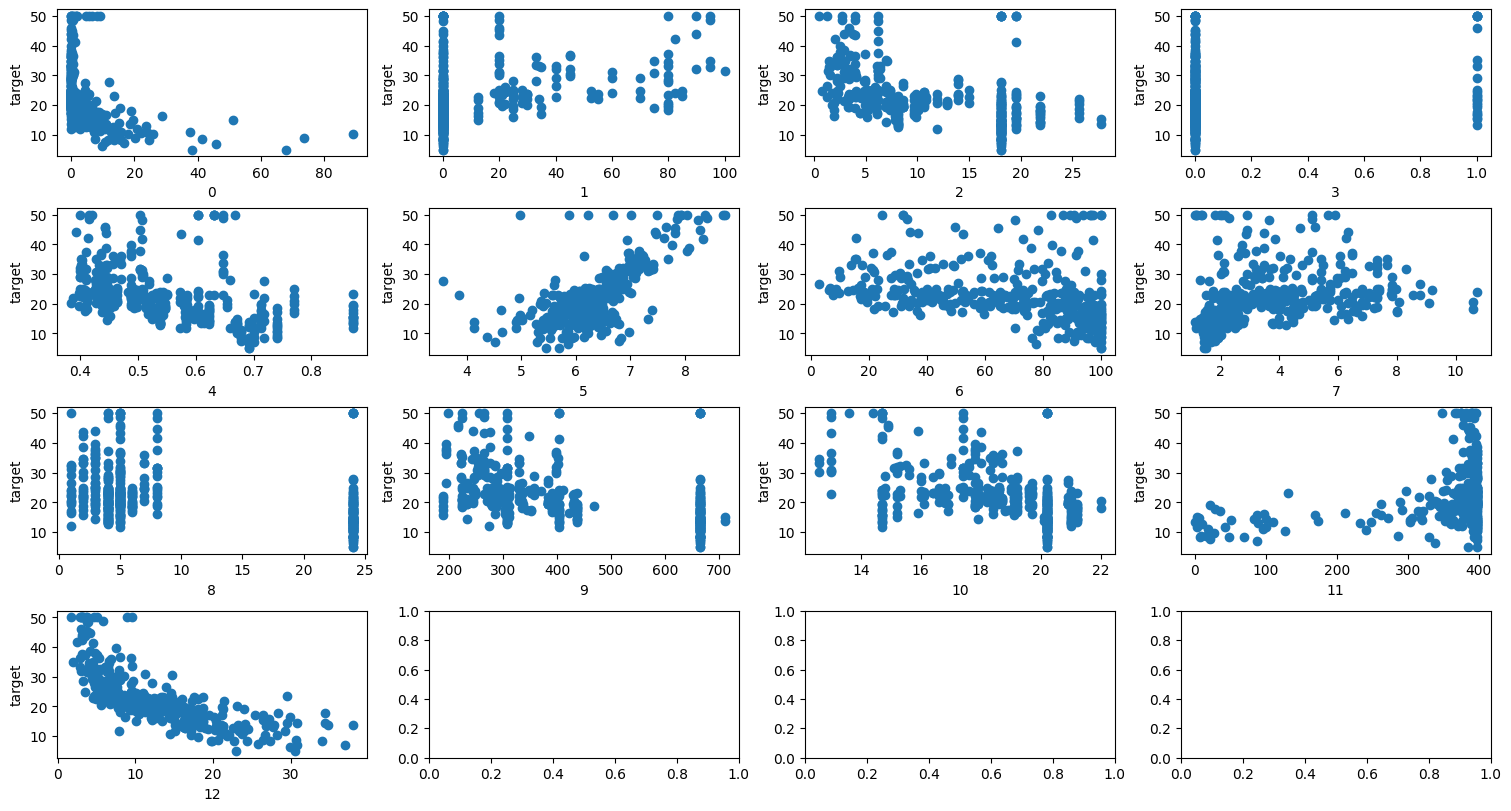

In [11]:
# visualize the relationship between the features and the response using scatterplots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#sns.pairplot(df_boston, x_vars=boston.feature_names, y_vars='target')

fig, axes = plt.subplots(4, 4,figsize=[15,8],constrained_layout=True)
axes = axes.flatten()
i=0
for x in df_boston.columns[:-1]:
    plt.sca(axes[i]) # set the current Axes
    plt.scatter(df_boston[x],df_boston.target)
    plt.xlabel(x)
    plt.ylabel("target")
    i+=1
    
plt.show()


### 🧪 **Exercise: Simple Linear Regression with One Feature**

#### 🎯 **Goal**: Use **Linear Regression** to predict housing prices using a single feature from the dataset.

---

### ✅ **Step-by-Step Instructions**:

1. **Data Exploration & Visualization**
   - Extract the **6th column (index 5)** of the dataset (e.g., average number of rooms).
   - Plot a **scatter plot** between this feature and the target variable (house price).
   - Label axes and provide a title.

2. **Preprocessing**
   - Reshape your feature array to a 2D format using `.reshape(-1, 1)`.
   - Define the **training and test sets** (`X_train`, `X_test`, `y_train`, `y_test`).

3. **Model Setup**
   - Import and initialize a **LinearRegression** model.
   - Use **GridSearchCV** with default parameters (no hyperparameter tuning) and 3-fold cross-validation.
   - Fit the model on the training data.

4. **Model Evaluation**
   - Report the **best score** from GridSearchCV and the model parameters.
   - Calculate and print the **R² score** on the test set.

5. **Residual Analysis**
   - Compute and store **residuals** for both train and test predictions.
   - Plot:
     - A scatter plot with train/test points and the regression line.
     - A histogram of the residuals.
     - A **QQ plot** comparing residuals to a normal distribution.
     - A histogram overlay comparing the residual distribution with a normal distribution.

6. **Error Metrics**
   - Print and interpret the following metrics for both **train and test sets**:
     - **MAE**: Mean Absolute Error
     - **MSE**: Mean Squared Error
     - **RMSE**: Root Mean Squared Error
     - **R²**: Coefficient of Determination

7. **Bonus: Normality Test**
   - Use the **Kolmogorov-Smirnov test** to check whether the scaled residuals follow a normal distribution.
   - Report the **KS statistic** and **p-value**, and interpret whether the residuals are normally distributed.


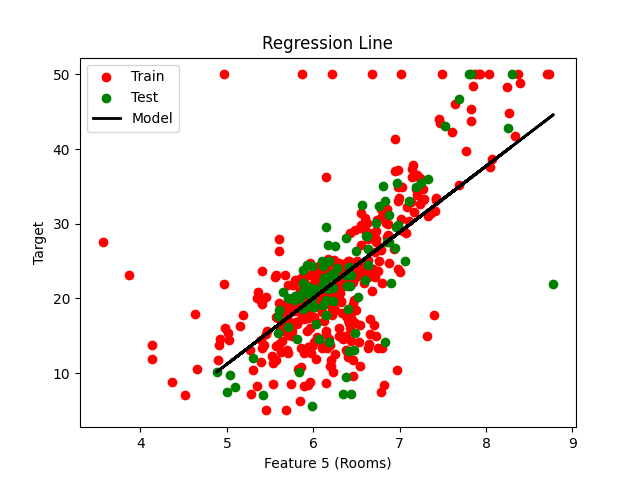

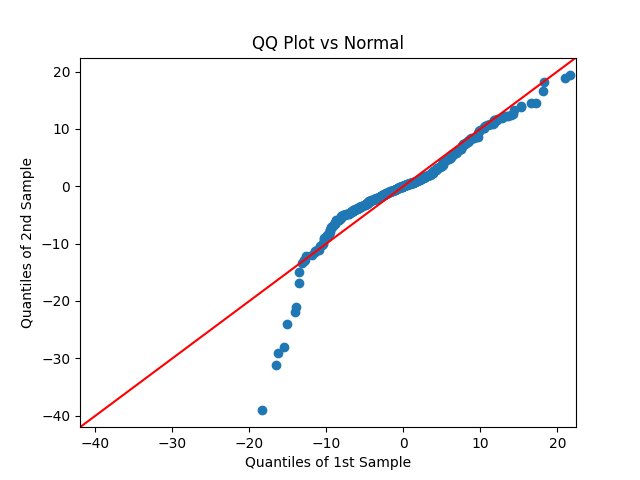

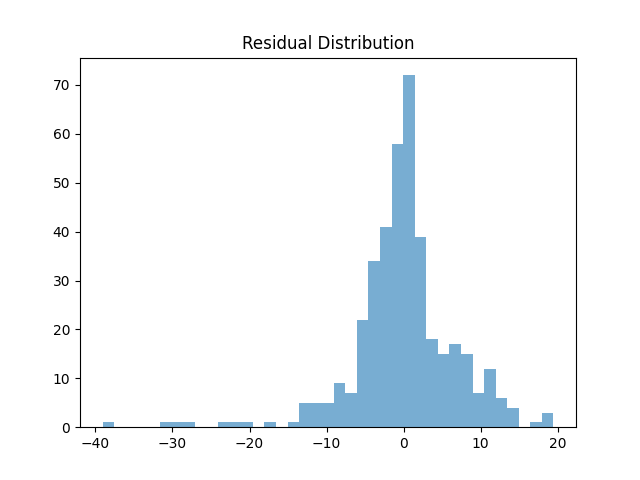

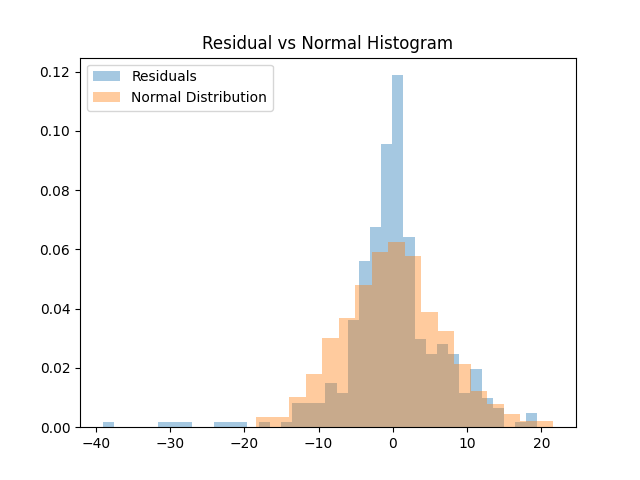